In [1]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)


In [3]:
titanic = pd.read_csv("titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#checking the null values in the dataset 
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# HERE AGE VALUES ARE MISSING 
sum(pd.isnull(titanic['Age']))

177

In [10]:
#LETS CHECK THE PROPORTION PERCENTAGE OF MISSING VALUES
round(177/(len(titanic["PassengerId"])),4)

0.1987

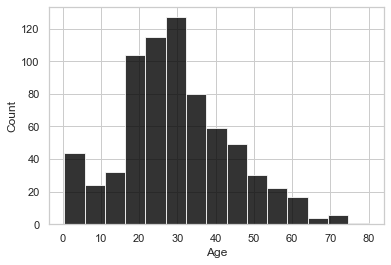

In [11]:
#ALMOST 20 PERCENT DATA IS MISSING IN THE DATA SET HENCE WE WILL SEE BY THE GRAPHICAL VIEW
sn = titanic["Age"].hist(bins=15, color='black', alpha=0.8)
sn.set(xlabel='Age', ylabel='Count')
plt.show()

# HERE THE AGE IS RIGHT AS WE CAN SEE SO FOR THE MISSING VALUES WE WILL USE MEDIAN

In [12]:
titanic["Age"].median(skipna=True)


28.0

In [13]:
#NOW LETS SEE FOR THE SECOND CASE OF CABIN MISSING VALUES 
round(687/len(titanic["PassengerId"]),4)

0.771

# ALMOST 77% DATA IS MISSING IN THE CABIN VALUES HENCE ITS BETTER TO IGNORE IT IN OUR MODEL

In [14]:
#NOW FOR EMBARKED MISSING VALUES 
round(2/len(titanic["PassengerId"]),4)

0.0022

# AS WE CAN SEE ONLY 2% VALUES ARE MISSING HERE 


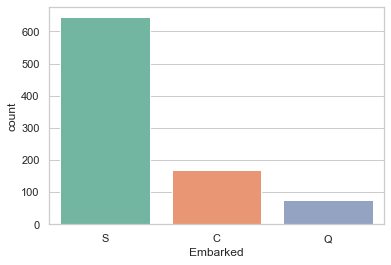

In [15]:
#PLOTTING THE COUNTPLOT FOR VISUALIZATION
sns.countplot(x='Embarked',data=titanic,palette='Set2')
plt.show()

# MOST OF THE PASSENGERS BORDED IN SOUTHHAMPTON HENCE WE WILL IMPUTE THOSE TWO NAN VALUES 

In [16]:
#SPLITTING THE DATA INTO TRAIN TEST 
train_data = titanic
train_data["Age"].fillna(28, inplace=True)
train_data["Embarked"].fillna("S", inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

In [17]:
#CREATING A CATEGORICAL DATA FOR THOSE WHO ARE TRAVELLING ALONE
train_data['TravelBuds']=train_data["SibSp"]+train_data["Parch"]
train_data['TravelAlone']=np.where(train_data['TravelBuds']>0, 0, 1)

In [19]:
#CATEGORICAL VARIABLE FOR THE PCLASS
train2 = pd.get_dummies(train_data, columns=["Pclass"])
train3 = pd.get_dummies(train2, columns=["Embarked"])
train4=pd.get_dummies(train3, columns=["Sex"])
train4.drop('Sex_female', axis=1, inplace=True)
train4.drop('PassengerId', axis=1, inplace=True)
train4.drop('Name', axis=1, inplace=True)
train4.drop('Ticket', axis=1, inplace=True)
train4.head(5)

,Survived,Age,SibSp,Parch,Fare,TravelBuds,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,1,0,7.2500,1,0,0,0,1,0,0,1,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1,0,0,1,0
3,1,35.0,1,0,53.1000,1,0,1,0,0,0,0,1,0
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1,1


In [20]:
df_final = train4

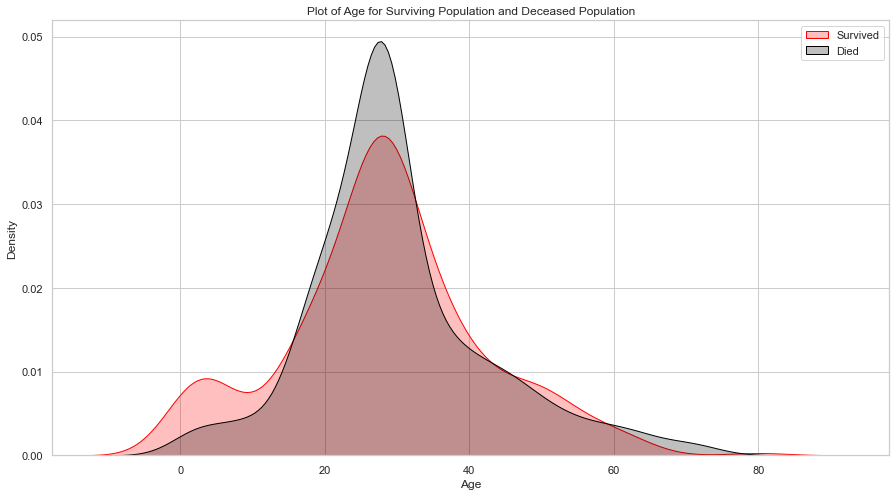

In [37]:
#EXPLORATION OF THE AGE 
plt.figure(figsize=(15,8))
sns.kdeplot(titanic["Age"][df_final.Survived == 1], color="red", shade=True)
sns.kdeplot(titanic["Age"][df_final.Survived == 0], color="black", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Plot of Age for Surviving Population and Deceased Population')
plt.show()

# THERE IS ONE NOTICABLE DIFFERENCE THAT MOST OF THE SURVIVORS WERE CHILDREN IN THIS CASE AS WE CAN SEE ABOVE CLEARLY 

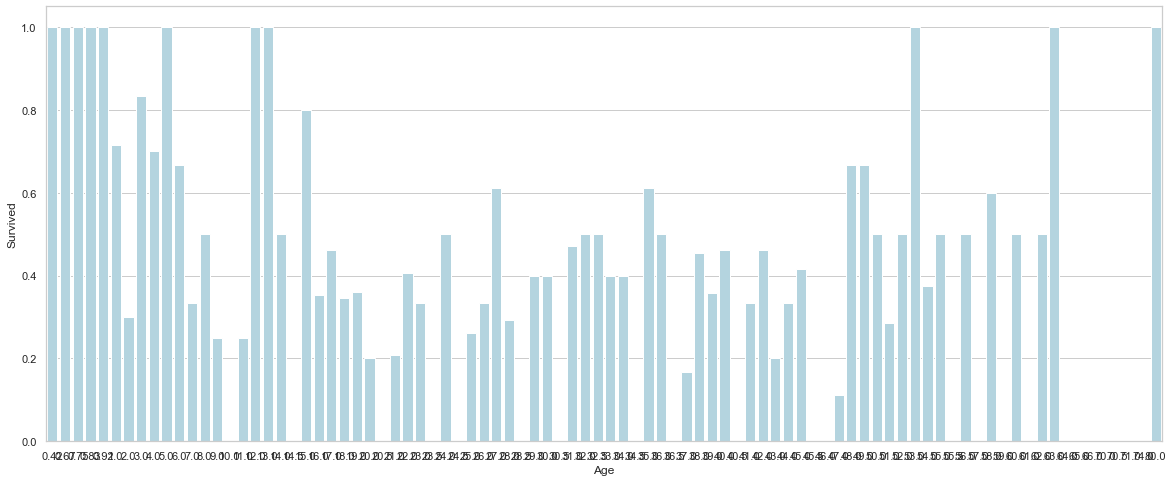

In [39]:
plt.figure(figsize=(20,8))
avg_survival_byage = df_final[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="Lightblue")

# LOOKING THE SURVIVAL RATE UNDER AGE 16 I WOULD ADD NEW CATEGORICAL VARIABLE IN THE DATASET AS MINOR

In [42]:
df_final['IsMinor']=np.where(train_data['Age']<=16, 1, 0)

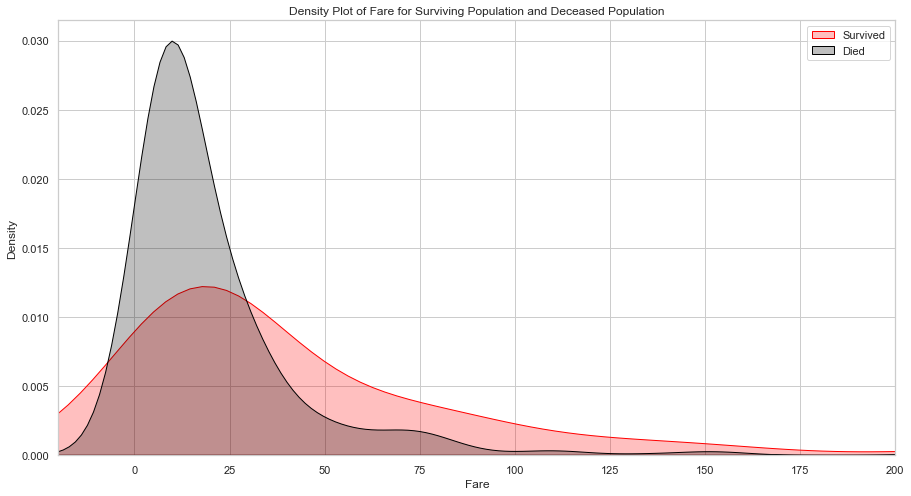

In [44]:
#EXPLORATION OF THE FARE 
plt.figure(figsize=(15,8))
sns.kdeplot(df_final["Fare"][titanic.Survived == 1], color="red", shade=True)
sns.kdeplot(df_final["Fare"][titanic.Survived == 0], color="black", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
# limit x axis to zoom on most information. there are a few outliers in fare. 
plt.xlim(-20,200)
plt.show()

# ABOVE DISTRIBUTION CLEARLY SHOWS THAT PASSENGERS WHO PAID LOW FARE WERE LIKELY SURVIVED WHICH IS STRONGLY RELATED TO THE PASSENGER CLASS HENCE WE NEED TO DO THE EXPLORATION OF THE PASSENGER CLASS

F:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


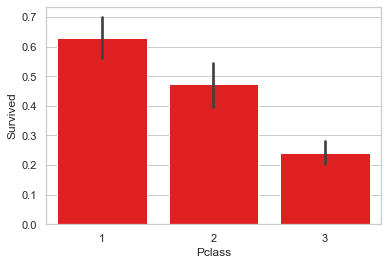

In [46]:
sns.barplot('Pclass', 'Survived', data=titanic, color="red")
plt.show()

# IT SHOWS THAT THE PASSENGERS IN THE FIRST CLASS HAVE SURVIVED MORE THAN COMPARED WITH OTHER CLASS

F:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


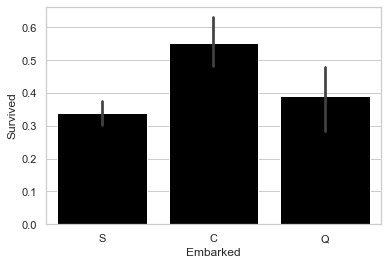

In [47]:
#EXPLORATION OF THE EMBARKED PORT 
sns.barplot('Embarked', 'Survived', data=titanic, color="black")
plt.show()


# THE SURVIVAL RATE OF THE PASSENGERS ALSO DEPEND ON ONE FACTOR WHICH IS ASSIGNMENT OF THE ROOMS THE PASSENGERS WHICH BORDED EARLIER GOT THE ROOMS CLOSE TO THE DECK

F:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


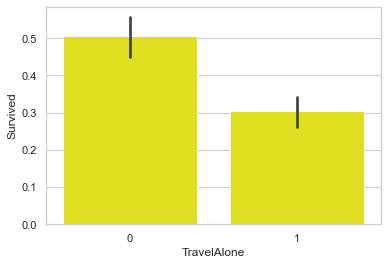

In [48]:
#NOW LETS EXPLORE THE PASSENGERS WHO WERE TRAVELLING ALONE AND TRAVELLING ALONG WITH FAMILY
sns.barplot('TravelAlone', 'Survived', data=df_final, color="yellow")
plt.show()

# ABOVE GRAPH SHOWS THAT PEOPLE WHO WERE TRAVELLING ALONE DIED MORE AND THE PEOPLE WHO WERE TRAVELLING ALONE WERE MOSTLY MALE

F:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


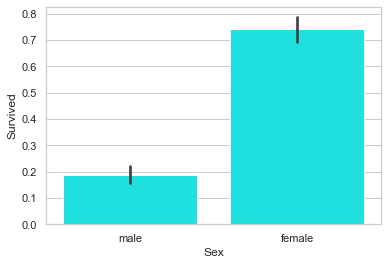

In [49]:
#EXPLORATION OF GENDER VARIABLE 
sns.barplot('Sex', 'Survived', data=titanic, color="aqua")
plt.show()


# FEMALES WERE THE MOST TO SURVIVE FROM THE ABOVE GRAPH

In [50]:
#HERE IS THE LOGISTIC REGRESSION RESULT 
df_final.head(20)

,Survived,Age,SibSp,Parch,Fare,TravelBuds,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,0,22.0,1,0,7.2500,1,0,0,0,1,0,0,1,1,0
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1,0,0,1,0,0
3,1,35.0,1,0,53.1000,1,0,1,0,0,0,0,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1,1,0
5,0,28.0,0,0,8.4583,0,1,0,0,1,0,1,0,1,0
6,0,54.0,0,0,51.8625,0,1,1,0,0,0,0,1,1,0
7,0,2.0,3,1,21.0750,4,0,0,0,1,0,0,1,1,1
8,1,27.0,0,2,11.1333,2,0,0,0,1,0,0,1,0,0
9,1,14.0,1,0,30.0708,1,0,0,1,0,1,0,0,0,1


In [51]:
cols=["Age", "Fare", "TravelAlone", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X=df_final[cols]
Y=df_final['Survived']

In [52]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.450348
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Thu, 25 Nov 2021   Pseudo R-squ.:                  0.3237
Time:                        12:38:20   Log-Likelihood:                -401.26
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.627e-78
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Age            -0.0096      0.007     -1.372      0.170      -0.023       0.004
Fare            0.0018    

# ALL THE VARIABLES ARE ALMOST SAME REMOVED FARE AND TRAVEL ALONE BOTH ALONG WITH ISMINOR 

In [53]:
cols2=["Age", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S","Sex_male"]  
X2=df_final[cols2]
Y=df_final['Survived']

logit_model=sm.Logit(Y,X2)
result=logit_model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.458585
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Thu, 25 Nov 2021   Pseudo R-squ.:                  0.3113
Time:                        12:41:04   Log-Likelihood:                -408.60
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.131e-77
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0158      0.006     -2.602      0.009      -0.028      -0.004
Pclass_1       2.0449      0.

In [54]:
#LETS CHECK THE MODEL PREDICTIVE SCORE 
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X2, Y)

logreg.score(X2, Y)

0.7912457912457912

# THE PREDICTIVE SCORE OF THE MODEL IS 79%

In [55]:
#USING THE SPLIT CROSS VALIDATION
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_final, test_size=0.2)

In [56]:
cols2=["Age", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S","Sex_male"] 
X3=train[cols2]
Y3=train['Survived']
logit_model3=sm.Logit(Y3,X3)

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X3, Y3)
logreg.score(X3, Y3)

0.8033707865168539

# THE PERFORMANCE SCORE OF THE NEW TRAINING SAMPLE IS 80%. NOW LETS CHECK HOW IT GOES WITH 20% SAMPLE

In [61]:
from sklearn import metrics
logreg.fit(X3, Y3)

X3_test = test[cols2]
Y3_test = test['Survived']

Y3test_pred = logreg.predict(X3_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X3_test, Y3_test)))

Accuracy of logistic regression classifier on test set: 0.76


In [62]:
#ACCESSING THE MODEL ON THE BASES OF ROC/AUC 
from sklearn.metrics import roc_auc_score
logreg.fit(X3, Y3)
Y3_pred = logreg.predict(X3)

y_true = Y3
y_scores = Y3_pred
roc_auc_score(y_true, y_scores)

0.7838767321892174

In [64]:
# VISUALIZING ROC AUC CURVE
from sklearn.metrics import roc_curve, auc
logreg.fit(X3, Y3)

y_test = Y3_test
X_test = X3_test
 
# Determine the false positive and true positive rates
FPR, TPR, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])


roc_auc = auc(FPR, TPR)
print ('ROC AUC: %0.3f' % roc_auc )


ROC AUC: 0.815


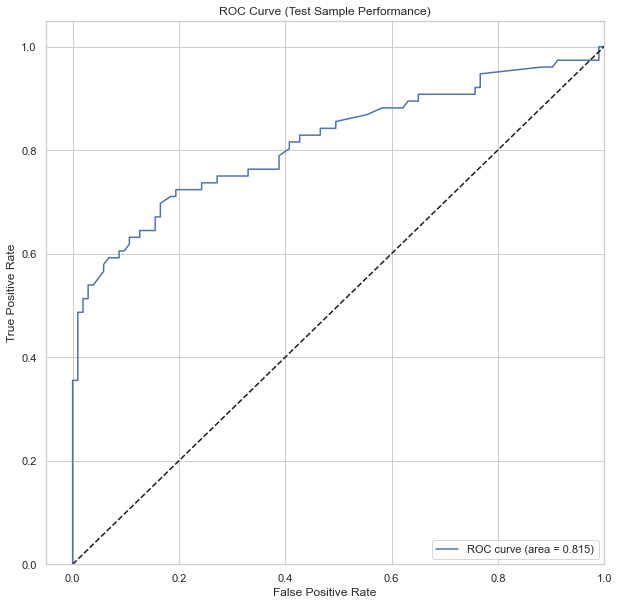

In [65]:
#PLOTTING ROC CURVE 
plt.figure(figsize=(10,10))
plt.plot(FPR, TPR, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Sample Performance)')
plt.legend(loc="lower right")
plt.show()

In [67]:
#FINALLY USING THE RANDOM FOREST ESTIMATION AS IT GIVES THE ACCURATE MACHINE LEARNING RESULTS 
from sklearn.ensemble import RandomForestClassifier

cols=["Age", "Fare", "TravelAlone", "Pclass_1", "Pclass_2","Embarked_C","Embarked_S","Sex_male","IsMinor"] 
X=df_final[cols]
Y=df_final['Survived']

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, Y)
random_forest.score(X, Y)

0.9797979797979798